In [1]:
# Python2.7 + pandas0.18.1 + numpy1.15.4 + matplotlib2.0.2 on CentOS7
from __future__ import division
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
home = os.getcwd()

# Linear regression with single variables单变量线性回归

In [3]:
data1 = pd.read_csv(os.path.join(home, "ex1data1.txt"), names=["population", "profit"])
data1.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


## Plotting the Data

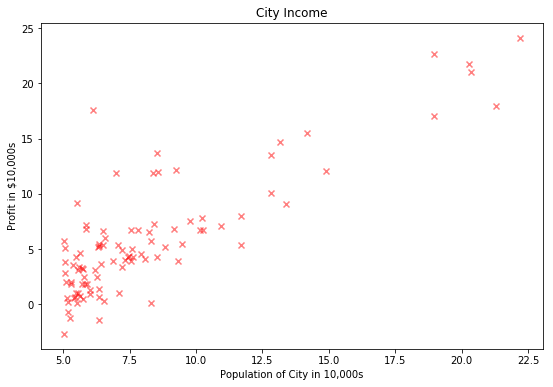

In [4]:
plt.figure(figsize=(9,6))
plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c='red',marker='x', alpha=0.5)
plt.title('City Income')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

### 数据准备

In [5]:
cols = data1.shape[1]
X = data1.iloc[:, 0:cols-1].values.reshape(-1, cols-1)
m = X.shape[0]
X = np.concatenate((np.ones(m).reshape(-1, cols-1), X), axis=1)
y = data1.iloc[:, cols-1:cols].values

In [6]:
X[0:5] # head of X

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [7]:
X.shape, y.shape

((97, 2), (97, 1))

## Gradient Descent

线性回归的代价函数是：      
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})^2$$          
(一元线性回归)hypothesis函数是：       
$$h_{\theta}(x) = \theta^{T}x = \theta_{0}+\theta_{1}x_{1}$$        
参数更新方法是：       
$$\theta_{j}:=\theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$         
注：同时更新所有参数$\theta$   

In [8]:
iterations = 1500     # 迭代次数
alpha = 0.01          # 学习率

In [9]:
# 用最简单的表示方法计算梯度下降
th0 = th1 = 0  # 初始化theta参数
for z in range(iterations):
    error0 = error1 = 0
    for i in range(m):               # 每次计算梯度下降，都需要遍历整个数据集
        xi = X[i]
        error = (th0*xi[0] + th1*xi[1]) - y[i]
        error0 += error*xi[0]
        error1 += error*xi[1]

    th0 = th0 - alpha*error0/m
    th1 = th1 - alpha*error1/m

print th0, th1

[-3.63029144] [1.16636235]


In [10]:
import copy

thetas = []           # 保存历史所有theta，以便后续做动态图
theta = np.zeros(2)   # 初始化theta参数

def compute_cost(X, y, theta):
    m = X.shape[0]
    error = np.zeros(1)
    for i in range(m):
        error += np.power(np.sum(theta*X[i]) - y[i], 2)
    return error[0]/2/m

def batch_gradient_decent(X, y, theta, alpha, iterations):
    m = X.shape[0]
    for z in range(iterations):
        thetas.append(copy.copy(theta))
        error = np.zeros(2)
        for i in range(m):                      # 每次计算梯度下降，都需要遍历整个数据集
            error += (sum(theta*X[i]) - y[i])*X[i]
        theta -=  alpha*error/m                 # alpha从0.01改成0.1，会无法收敛
    return theta

In [11]:
theta = batch_gradient_decent(X,y,theta,alpha,iterations)
theta

array([-3.63029144,  1.16636235])

In [12]:
compute_cost(X, y, theta)

4.483388256587727

In [13]:
compute_cost(X, y, [0, 0])

32.072733877455654

## 将X,y和theta转成matrix计算效率更高，代码更简洁

In [14]:
X_m = np.matrix(X)
y_m = np.matrix(y)
theta_m = np.matrix(np.zeros(X.shape[1])).T

In [15]:
X_m.shape, y_m.shape, theta_m.shape

((97, 2), (97, 1), (2, 1))

In [16]:
def compute_cost_m(X, y, theta):
    difs = np.power(X*theta - y, 2)
    return np.sum(difs)/2/X.shape[0]

In [17]:
def batch_gradient_decent_m(X, y, theta, alpha, iterations):
    costs = []
    m = X.shape[0]
    for i in range(iterations):
        errors = X.T * (X * theta - y) 
        theta -= alpha * errors / m
        costs.append(compute_cost_m(X, y, theta))
    return theta, costs

In [18]:
# 计算速度比依次遍历数据集快很多
theta_m, costs = batch_gradient_decent_m(X_m, y_m, theta_m, alpha, iterations)
theta_m

matrix([[-3.63029144],
        [ 1.16636235]])

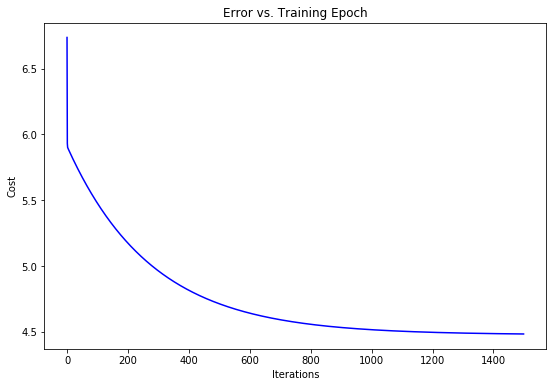

In [19]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iterations), costs, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [20]:
compute_cost_m(X_m, y_m, theta_m)  

4.483388256587726

In [21]:
compute_cost_m(X_m, y_m, np.matrix(np.zeros(X.shape[1])).T)     # theta = [0, 0]

32.072733877455676

### 展示预测结果和训练数据

In [22]:
x_min, x_max = min(data1.iloc[:, 0]), max(data1.iloc[:, 0])
def y_p(theta, x):     # predict of 'y=kx+b'
    return sum(theta*[1, x])

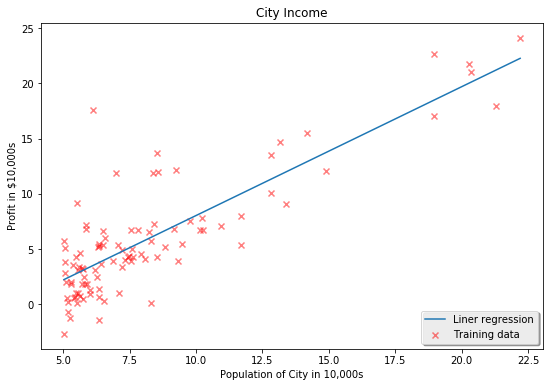

In [23]:
%matplotlib inline
plt.figure(figsize=(9,6))
plt.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c='red',marker='x', alpha=0.5, label="Training data",)
plt.plot([x_min, x_max], [y_p(theta, x_min), y_p(theta, x_max)], label="Liner regression")

plt.title('City Income')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc="lower right", shadow=True)   # 设置图例位置,loc可以为[upper, lower, left, right, center]

#### 动态展示预测拟合过程

In [24]:
%matplotlib notebook

def dynamic_plot():
    # 生成画布
    fig = plt.figure(figsize=(9, 6), dpi=80)
    ax = fig.add_subplot(111)
    # 打开交互模式
    plt.ion()

    fig.show()
    fig.canvas.draw()

    # 循环
    for th in thetas:
        # 清除原有图像
        ax.clear()
        # 画两条曲线
        ax.scatter(data1.iloc[:, 0], data1.iloc[:, 1], c='red',marker='x', alpha=0.5, label="Training data")
        ax.plot([x_min, x_max], [y_p(th, x_min), y_p(th, x_max)], label="Liner regression")
        # 设置图例位置,loc可以为[upper, lower, left, right, center]
        ax.legend(loc="lower right", shadow=True)
        fig.canvas.draw()
        # 暂停
        # plt.pause(0.1)
    # # 关闭交互模式
    # plt.ioff()
    # 图形显示
    # plt.show()

<IPython.core.display.Javascript object>


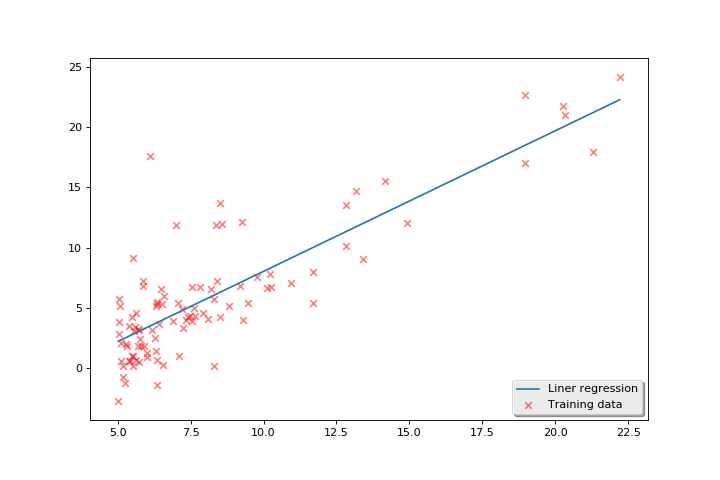

<IPython.core.display.Javascript object>


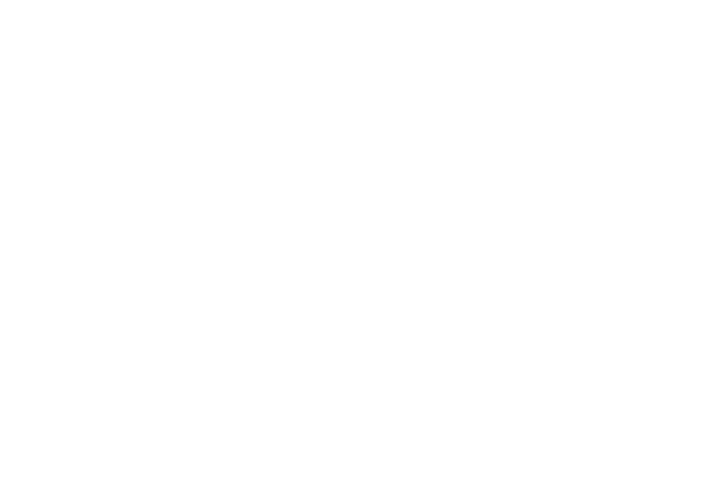

In [199]:
dynamic_plot()

# Linear regression with multiple variables多变量线性回归

In [25]:
data2 = pd.read_csv(os.path.join(home, "ex1data2.txt"), names=["size", "bedrooms", "price"])
data2.tail()

,size,bedrooms,price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [26]:
data2.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [27]:
data2.describe().loc[["mean", "std"], ["size", "bedrooms"]]

,size,bedrooms
mean,2000.680851,3.170213
std,794.702354,0.760982


## Feature Normalizatio特征标准化

In [28]:
def normalize(df):
    return (df - df.mean()) / df.std()

In [29]:
X2 = normalize(data2[["size", "bedrooms"]])
X2.insert(0, "ones", np.ones(X2.shape[0])) 
X2.tail()

,ones,size,bedrooms
42,1.0,0.712618,1.090417
43,1.0,-1.007523,-0.223675
44,1.0,-1.445423,-1.537767
45,1.0,-0.187090,1.090417
46,1.0,-1.003748,-0.223675


In [30]:
X_m2 = np.matrix(X2)
y_m2 = np.matrix(data2[["price"]])
theta_m2 = np.matrix(np.zeros(X_m2.shape[1])).T

In [31]:
X_m2.shape, y_m2.shape, theta_m2.shape

((47, 3), (47, 1), (3, 1))

In [32]:
theta_m2, costs2 = batch_gradient_decent_m(X_m2, y_m2, theta_m2, alpha, iterations)
theta_m2

matrix([[340412.56301439],
        [110540.56654627],
        [ -6558.99054811]])

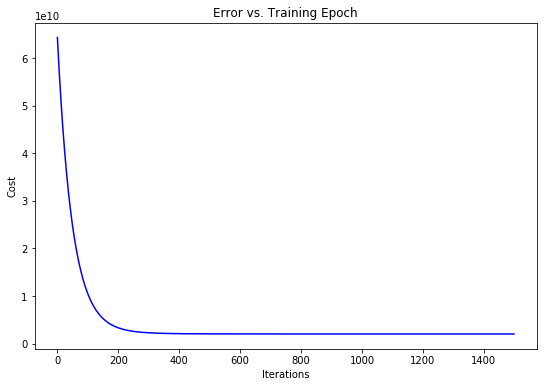

In [33]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iterations), costs2, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [34]:
compute_cost_m(X_m2, y_m2, theta_m2)  

2043283576.6373606

In [35]:
compute_cost_m(X_m2, y_m2, np.matrix(np.zeros(X_m2.shape[1])).T)  # theta = [0, 0, 0]

65591548106.45744

### 测试数据

In [36]:
# 均值
mu = data2.describe().loc["mean", ["size", "bedrooms"]].values
mu

array([2000.68085106,    3.17021277])

In [37]:
# 标准差
sigma = data2.describe().loc["std", ["size", "bedrooms"]].values
sigma

array([7.94702354e+02, 7.60981887e-01])

In [38]:
np.insert(([1650, 3] - mu) / sigma, 0, 1) * theta_m2      # normalize之后才进行计算

matrix([[293101.05685748]])

## 学习率对梯度下降收敛的影响

In [39]:
alphas = [0.0005, 0.001, 0.005, 0.01, 0.05]
costs = []

for a in alphas:    
    _theta = np.matrix(np.zeros(X_m2.shape[1])).T
    _theta, _cost = batch_gradient_decent_m(X_m2, y_m2, _theta, a, iterations)
    costs.append(_cost)

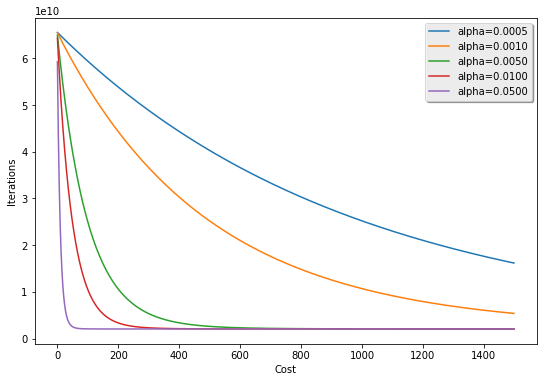

In [40]:
%matplotlib inline
plt.figure(figsize=(9,6))

for i in range(len(alphas)):
    plt.plot(np.arange(iterations), costs[i], label="alpha=%.4f" % alphas[i])

plt.xlabel('Cost')
plt.ylabel('Iterations')
plt.legend(loc="upper right", shadow=True)   # 设置图例位置,loc可以为[upper, lower, left, right, center]

# Normal Equation正规方程

可以通过数据X和y直接计算参数theta，公式是：
$$\theta = (X^TX)^{-1}X^Ty$$      

与梯度下降的优缺点比较：
 - 梯度下降是针对凸函数的一种通用优化方法，而且当特征数量n大时也能较好适用，适用于各种类型的模型。但需要选择学习率$\alpha$，需要多次迭代。
 - 正规方程不需要选择学习率$\alpha$，一次计算得出。但需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [41]:
def normal_eqn(X, y):
    theta = np.linalg.inv(X.T*X)*X.T*y        
    return theta

In [42]:
theta2 = normal_eqn(X_m2, y_m2) 
theta2

matrix([[340412.65957447],
        [110631.05027885],
        [ -6649.47427082]])

In [43]:
theta1 = normal_eqn(X_m, y_m) 
theta1

matrix([[-3.89578088],
        [ 1.19303364]])

In [45]:
# 梯度下降计算的结果是，相比较而言，alpha=0.01,iter=1500的梯度下降计算结果精度更高
# matrix([[-3.63029144],
#        [ 1.16636235]])